## Will try to initiate an autoencoder in PyTorch
* Inspired by https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/ *

In [16]:

import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np


### Autoencoder will learn an MNIST dataset and consequently will reproduce the number from MNIST

In [17]:
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = transforms.ToTensor()) #

### Artificially decrease amount of data

In [18]:
#_, dataset=torch.utils.data.random_split(dataset, [int(0.99*len(dataset)), int(0.01*len(dataset))])

In [19]:

train_set, test_set, valid_set =\
                torch.utils.data.random_split(dataset, (int(0.7*len(dataset)), int(0.15*len(dataset)), int(0.15*len(dataset))))

In [20]:
train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size = 32)
validation_loader = torch.utils.data.DataLoader(dataset = valid_set, batch_size = 32)
test_loader = torch.utils.data.DataLoader(dataset = test_set, batch_size = 32)

In [21]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 10
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 10)
        )
         
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 10 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

Just a function used for visualization

In [22]:
def plot_digits(*args): #just plotting the result

    n = min([x.shape[0] for x in args]) #n=5
    
    plt.figure(figsize=(2*n, 2*len(args))) #10 na 4
    for j in range(n): #j [1,2,3,4,5]
        for i in range(len(args)): #i [1,2]
            img=args[i][j].reshape(-1,28,28).detach().numpy()
            ax = plt.subplot(len(args), n, i*n + j + 1) #arguments: nrows, ncols, index
            plt.imshow(img[0])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [23]:
#blab lbalvsdbmsfdkmsal

In [24]:
model = AE()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-2,
                             weight_decay = 1e-8)

In [33]:

epochs = 4
outputs = []
losses = []
val_losses=[]
for epoch in range(epochs):
    for (images_in_batch, _) in train_loader: 
        
# Reshaping the image to (-1, 784)
        images_in_batch = images_in_batch.reshape(-1, 28*28)
       
# Output of Autoencoder
        reconstructed = model(images_in_batch)[0]
       
# Calculating the loss function
        loss = loss_function(reconstructed, images_in_batch)
       
# The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()   
        
# Storing the losses in a list for plotting
        losses.append(loss.detach().numpy()) #error at the end of the training on one batch := train_losses
    
# calculating validation loss (error for the last img of the batch) 
        one_img, _=validation_loader.dataset[int(np.random.random()*len(validation_loader.dataset))] #picking 1 random image from validation dataset
        one_img=one_img.reshape(-1, 28*28)
        one_res=model(one_img)[0]
        val_loss=loss_function(one_res, one_img)
        val_losses.append(val_loss.detach().numpy())
    outputs.append((epochs, one_img, reconstructed))

In [1]:
%matplotlib widget
import scipy
import numpy as np
smooth_losses=scipy.ndimage.gaussian_filter(losses, 100) #because original losses are too noisy to see the pattern
smooth_val_losses=scipy.ndimage.gaussian_filter(val_losses, 100)

figs, axs = plt.subplots()
axs.plot(np.arange(0,len(losses)), smooth_val_losses, label='valid loss')
axs.plot(np.arange(0,len(losses)), smooth_losses, label='train loss')
axs.legend()

NameError: name 'losses' is not defined

In [37]:
xbatch, ybatch =next(iter(test_loader))
xbatch=xbatch.reshape(-1,28*28)
a=[model(x)[0] for x in xbatch[:5]]
a=torch.stack(a, dim=0)

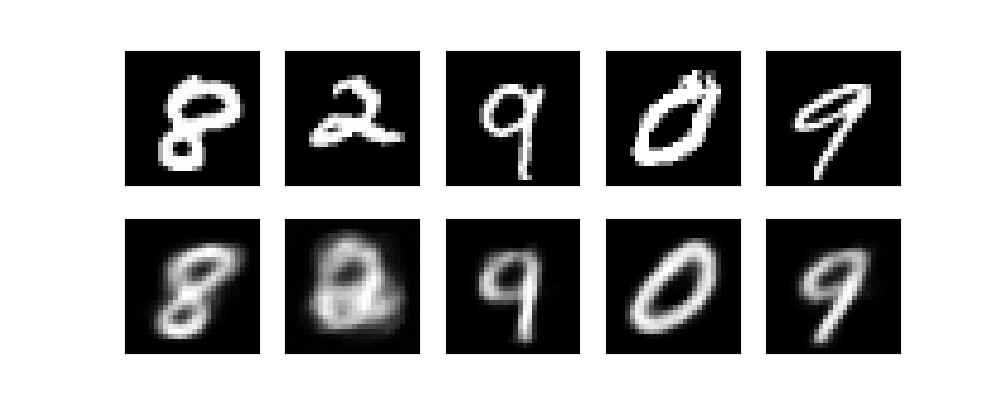

In [38]:
plot_digits(xbatch[:5], a)

- [x] Strange course of validation and train losses (Have I implemented it correctly?)
- [x] Find a way to use encoder and decoder separately
- [x] use PT lightning?

### Let's try to save the Model

In [42]:
torch.save(model.state_dict(), 'C:\\Users\\aleks\\Projects\\arameic-mishmash\\MNISTmodel.pt')

In [43]:
loaded_model = AE()
loaded_model.load_state_dict(torch.load('C:\\Users\\aleks\\Projects\\arameic-mishmash\\MNISTmodel.pt'))
loaded_model.eval()

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=36, bias=True)
    (5): ReLU()
    (6): Linear(in_features=36, out_features=18, bias=True)
    (7): ReLU()
    (8): Linear(in_features=18, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=36, bias=True)
    (3): ReLU()
    (4): Linear(in_features=36, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=784, bias=True)
    (9): Sigmoid()
  )
)

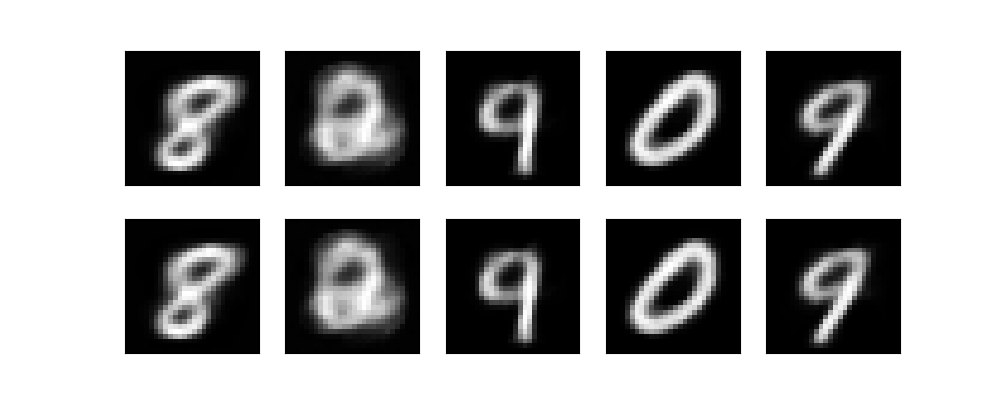

In [45]:
xbatch, ybatch =next(iter(test_loader))
xbatch=xbatch.reshape(-1,28*28)
a=[model(x)[0] for x in xbatch[:5]]
a=torch.stack(a, dim=0)
b=[loaded_model(x)[0] for x in xbatch[:5]]
b=torch.stack(b, dim=0)
plot_digits(b, a)

### Check if weights are equal

In [72]:
def models_are_eq(model1, model2):
    for (nameA, paramA), (nameB, paramB) in zip(model.named_parameters(), loaded_model.named_parameters()):
        if (paramA == paramB).all():
            print('{} matches {}'.format(nameA, nameB))
        else:
            print('{} does not match {}'.format(nameA, nameB))
    for p1, p2 in zip(model1.parameters(), model2.parameters()):
        if p1.data.ne(p2.data).sum() > 0:
            return False
    return True

models_are_eq(model, loaded_model)

encoder.0.weight matches encoder.0.weight
encoder.0.bias matches encoder.0.bias
encoder.2.weight matches encoder.2.weight
encoder.2.bias matches encoder.2.bias
encoder.4.weight matches encoder.4.weight
encoder.4.bias matches encoder.4.bias
encoder.6.weight matches encoder.6.weight
encoder.6.bias matches encoder.6.bias
encoder.8.weight matches encoder.8.weight
encoder.8.bias matches encoder.8.bias
decoder.0.weight matches decoder.0.weight
decoder.0.bias matches decoder.0.bias
decoder.2.weight matches decoder.2.weight
decoder.2.bias matches decoder.2.bias
decoder.4.weight matches decoder.4.weight
decoder.4.bias matches decoder.4.bias
decoder.6.weight matches decoder.6.weight
decoder.6.bias matches decoder.6.bias
decoder.8.weight matches decoder.8.weight
decoder.8.bias matches decoder.8.bias


True

### Let's try to transfer encoder's layers from pretrained `model` to untrained `encmodel`

In [117]:
class Encoder(torch.nn.Module): #shape of the model mathes the shape of AE class
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 10
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 10)
        )
         
    def forward(self, x):
        encoded = self.encoder(x)
        return encoded

rawmodel=Encoder() #Untrained model

In [136]:
model.state_dict().items()

for name, param in model.state_dict().items():
    print(name)

encoder.0.weight
encoder.0.bias
encoder.2.weight
encoder.2.bias
encoder.4.weight
encoder.4.bias
encoder.6.weight
encoder.6.bias
encoder.8.weight
encoder.8.bias
decoder.0.weight
decoder.0.bias
decoder.2.weight
decoder.2.bias
decoder.4.weight
decoder.4.bias
decoder.6.weight
decoder.6.bias
decoder.8.weight
decoder.8.bias


In [122]:
pretrained_dict = model.state_dict()
model_dict = rawmodel.state_dict()

# 1. filter out unnecessary keys. Or copies only 'encoder' part
pretrained_dict = {name: values for name, values in pretrained_dict.items() if 'encoder' in name}
# 2. overwrite entries in the existing state dict
model_dict.update(pretrained_dict) 
# 3. load the new state dict
rawmodel.load_state_dict(pretrained_dict)

<All keys matched successfully>

In [124]:
for name, param in rawmodel.state_dict().items():
    print(name)

encoder.0.weight
encoder.0.bias
encoder.2.weight
encoder.2.bias
encoder.4.weight
encoder.4.bias
encoder.6.weight
encoder.6.bias
encoder.8.weight
encoder.8.bias


### Test if `rawmodel` encoder does the same thing as `model`'s trained encoder``

In [115]:
xbatch, ybatch =next(iter(test_loader))
xbatch=xbatch.reshape(-1,28*28)
a=[model(x)[1] for x in xbatch[:5]]
a=torch.stack(a, dim=0)
b=[rawmodel(x) for x in xbatch[:5]]
b=torch.stack(b, dim=0)

torch.all(a==b)

tensor(True)

# It DOES
### Let's now try to create an autoencoder with three pretrained and frozen layers, and then train the rest of them

In [212]:
premodel=AE()
dict = model.state_dict()
premodel_dict = premodel.state_dict()

#select 1-th, 2-th, 3-th layers of the encoder
dict = {key: v for key, v in model.state_dict().items() if np.logical_and('encoder' in key, np.array(['0' in key, '2' in key, '4' in key]).any())}

for name, param in dict.items():
    print(name)
premodel_dict.update(dict)

premodel.load_state_dict(premodel_dict)

encoder.0.weight
encoder.0.bias
encoder.2.weight
encoder.2.bias
encoder.4.weight
encoder.4.bias


<All keys matched successfully>

### `premodel` now has pretrained first 3 layers
### Let's now freeze these layers

In [255]:

for preparam, param in zip(premodel.parameters(), model.parameters()):
    if (preparam==param).all():
        preparam.requires_grad = False
        print('weights or biases are changed')

#We've freezed weights and biases for 3 layers, 6 freezes in total

weights or biases are changed
weights or biases are changed
weights or biases are changed
weights or biases are changed
weights or biases are changed
weights or biases are changed


### Dummy training of the pretrained model

In [216]:
preoptimizer = torch.optim.Adam(premodel.parameters(),
                             lr = 1e-2,
                             weight_decay = 1e-8)
epochs = 2
outputs = []
losses = []
val_losses=[]
for epoch in range(epochs):
    for (images_in_batch, _) in train_loader: 
        
# Reshaping the image to (-1, 784)
        images_in_batch = images_in_batch.reshape(-1, 28*28)
       
# Output of Autoencoder
        reconstructed = premodel(images_in_batch)[0]
       
# Calculating the loss function
        loss = loss_function(reconstructed, images_in_batch)
       
# The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        preoptimizer.zero_grad()
        loss.backward()
        preoptimizer.step()   
        
# Storing the losses in a list for plotting
        losses.append(loss.detach().numpy()) #error at the end of the training on one batch := train_losses
    
# calculating validation loss (error for the last img of the batch) 
        one_img, _=validation_loader.dataset[int(np.random.random()*len(validation_loader.dataset))] #picking 1 random image from validation dataset
        one_img=one_img.reshape(-1, 28*28)
        one_res=premodel(one_img)[0]
        val_loss=loss_function(one_res, one_img)
        val_losses.append(val_loss.detach().numpy())
    outputs.append((epochs, one_img, reconstructed))

### Compare results of original model and model with frozen three first layers

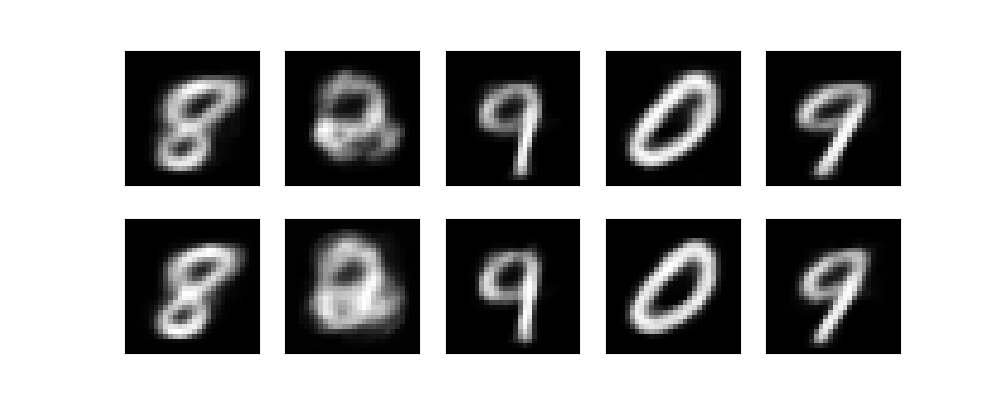

In [217]:
xbatch, ybatch =next(iter(test_loader))
xbatch=xbatch.reshape(-1,28*28)
a=[model(x)[0] for x in xbatch[:5]]
a=torch.stack(a, dim=0)

c=[premodel(x)[0] for x in xbatch[:5]]
c=torch.stack(c, dim=0)
plot_digits(c, a)


### Compare `model` and `premodel`

In [218]:
models_are_eq(model, premodel)

encoder.0.weight matches encoder.0.weight
encoder.0.bias matches encoder.0.bias
encoder.2.weight matches encoder.2.weight
encoder.2.bias matches encoder.2.bias
encoder.4.weight matches encoder.4.weight
encoder.4.bias matches encoder.4.bias
encoder.6.weight matches encoder.6.weight
encoder.6.bias matches encoder.6.bias
encoder.8.weight matches encoder.8.weight
encoder.8.bias matches encoder.8.bias
decoder.0.weight matches decoder.0.weight
decoder.0.bias matches decoder.0.bias
decoder.2.weight matches decoder.2.weight
decoder.2.bias matches decoder.2.bias
decoder.4.weight matches decoder.4.weight
decoder.4.bias matches decoder.4.bias
decoder.6.weight matches decoder.6.weight
decoder.6.bias matches decoder.6.bias
decoder.8.weight matches decoder.8.weight
decoder.8.bias matches decoder.8.bias


False

In [256]:
print('are third layers equal?' ,(model.state_dict()['encoder.4.weight']==premodel.state_dict()['encoder.4.weight']).all())

print('are fourth layers equal?' ,(model.state_dict()['encoder.6.weight']==premodel.state_dict()['encoder.6.weight']).all())

are third layers equal? tensor(True)
are fourth layers equal? tensor(False)
